# Assignment2

In [1]:
library(dplyr)
library(data.table) 
library(magrittr)
#install.packages("stargazer", repos='http://cran.us.r-project.org')
library(stargazer) 
library(ggplot2)
library(repr)
#install.packages("lfe", repos='http://cran.us.r-project.org')
library(lfe) 
#install.packages("plm", repos='http://cran.us.r-project.org')
library(plm) 


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘data.table’

The following objects are masked from ‘package:dplyr’:

    between, first, last


Please cite as: 

 Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary Statistics Tables.
 R package version 5.2.2. https://CRAN.R-project.org/package=stargazer 

Loading required package: Matrix
Loading required package: Formula

Attaching package: ‘plm’

The following object is masked from ‘package:lfe’:

    sargan

The following object is masked from ‘package:data.table’:

    between

The following objects are masked from ‘package:dplyr’:

    between, lag, lead



In [2]:
setwd("..")

In [3]:
options(repr.plot.width=4, repr.plot.height=4)

#### 1. Drop RESPONSE == 9 and PREFEC > 47 (which effectively removes the PR candidates). Also, drop wave 1 in the 2003 data, (i.e.,the data included in “2003ates1v1.csv”).

In [4]:
ta_panel <- read.csv('build_input/data_todai-asahi/output/syuuin_2003_2014_py.csv', header=T,fileEncoding="CP932")
print(dim(ta_panel))
summary(ta_panel[,"PREFEC"])
summary(ta_panel[,"RESPONSE"])
ta_panel <- subset(ta_panel,(PREFEC <= 47) & (!is.na(PREFEC)) & (RESPONSE != 9)) 
summary(ta_panel[,"PREFEC"])
summary(ta_panel[,"RESPONSE"])
ta_panel <- subset(ta_panel,(ELECYEAR != 2002) & (!is.na(ELECYEAR))) 
summary(ta_panel[,"ELECYEAR"])
print(dim(ta_panel))


[1] 6839   54


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   1.00   13.00   23.00   25.83   37.00   66.00     377 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  1.0000  1.0000  0.9613  1.0000  9.0000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   12.00   20.00   21.05   28.00   47.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  1.0000  1.0000  0.9758  1.0000  2.0000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2003    2005    2009    2009    2012    2014 

[1] 5407   54


### 2. Make a summary table using the following variables, and save it as a tex file. - ELECYEAR, PREFEC, DISTRICT, INCUMB, TERM, SEX, AGE, RESULT

In [5]:
attr <- subset(ta_panel, select = c("ELECYEAR", "PREFEC", "DISTRICT", "INCUMB","TERM", "SEX", "AGE", "RESULT"))
stargazer(attr, out="analysis_output/assign2_sum_stat_R.tex")


% Table created by stargazer v.5.2.2 by Marek Hlavac, Harvard University. E-mail: hlavac at fas.harvard.edu
% Date and time: 金,  7 20, 2018 - 00時06分28秒
\begin{table}[!htbp] \centering 
  \caption{} 
  \label{} 
\begin{tabular}{@{\extracolsep{5pt}}lccccccc} 
\\[-1.8ex]\hline 
\hline \\[-1.8ex] 
Statistic & \multicolumn{1}{c}{N} & \multicolumn{1}{c}{Mean} & \multicolumn{1}{c}{St. Dev.} & \multicolumn{1}{c}{Min} & \multicolumn{1}{c}{Pctl(25)} & \multicolumn{1}{c}{Pctl(75)} & \multicolumn{1}{c}{Max} \\ 
\hline \\[-1.8ex] 
ELECYEAR & 5,407 & 2,008.735 & 4.035 & 2,003 & 2,005 & 2,012 & 2,014 \\ 
PREFEC & 5,407 & 21.030 & 12.341 & 1 & 12 & 28 & 47 \\ 
DISTRICT & 5,407 & 5.731 & 5.083 & 1 & 2 & 8 & 25 \\ 
INCUMB & 5,407 & 1.795 & 0.889 & 1 & 1 & 3 & 3 \\ 
TERM & 3,392 & 1.451 & 2.390 & 0.000 & 0.000 & 2.000 & 16.000 \\ 
SEX & 4,381 & 1.146 & 0.353 & 1.000 & 1.000 & 1.000 & 2.000 \\ 
AGE & 4,379 & 50.511 & 11.172 & 25.000 & 42.000 & 59.000 & 94.000 \\ 
RESULT & 5,407 & 3.063 & 1.311 & 1 & 1 & 

### 3. Count the frequency of candidates for each party. Which political party has the largest number of candidates in the data?

In [6]:
count(ta_panel, PARTY)

PARTY,n
みんなの党,79
維新の党,77
改革クラブ,1
共産党,1318
公明党,45
国民新党,21
次世代の党,38
自民党,1429
自由連合,1
社会民主党,38


The largest party is 自民党. 

### 4. Make a bar graph of the exercise 3. Sort bars in descending order. Add a title “Political candidates”. Save the graph as a png file.

In [7]:
ta_panel$PARTY <- as.factor(ta_panel$PARTY)
class(ta_panel$PARTY)
levels(ta_panel$PARTY)
table(ta_panel$PARTY)

[1] "factor"

[1] "みんなの党"   "維新の党"     "改革クラブ"   "共産党"       "欠員"        
 [6] "公明党"       "幸福実現党"   "国民新党"     "支持政党なし" "次世代の党"  
[11] "自民党"       "自由党"       "自由連合"     "社会民主党"   "社民党"      
[16] "諸派"         "新党改革"     "新党大地"     "新党日本"     "生活の党"    
[21] "尊命"         "日本維新の会" "保守新党"     "未来の党"     "民主党"      
[26] "無所属"       "無所属の会"


  みんなの党     維新の党   改革クラブ       共産党         欠員       公明党 
          79           77            1         1318            0           45 
  幸福実現党     国民新党 支持政党なし   次世代の党       自民党       自由党 
           0           21            0           38         1429            0 
    自由連合   社会民主党       社民党         諸派     新党改革     新党大地 
           1           38          134          328            0            7 
    新党日本     生活の党         尊命 日本維新の会     保守新党     未来の党 
           9           13            0          151           11          111 
      民主党       無所属   無所属の会 
        1269          319            8 

          party number
1    みんなの党     79
2      維新の党     77
3    改革クラブ      1
4        共産党   1318
5          欠員      0
6        公明党     45
7    幸福実現党      0
8      国民新党     21
9  支持政党なし      0
10   次世代の党     38
11       自民党   1429
12       自由党      0
13     自由連合      1
14   社会民主党     38
15       社民党    134
16         諸派    328
17     新党改革      0
18     新党大地      7
19     新党日本      9
20     生活の党     13
21         尊命      0
22 日本維新の会    151
23     保守新党     11
24     未来の党    111
25       民主党   1269
26       無所属    319
27   無所属の会      8


Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自民党' で変換に失敗: <e8> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自民党' で変換に失敗: <87> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自民党' で変換に失敗: <aa> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自民党' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自民党' で変換に失敗: <b0> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自民党' で変換に失敗: <91> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自民党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label),

“ 'mbcsToSbcs' 中の '社民党' で変換に失敗: <a4> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社民党' で変換に失敗: <be> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社民党' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社民党' で変換に失敗: <b0> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社民党' で変換に失敗: <91> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社民党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社民党' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社民党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in

“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <96> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <e4> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <bb> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <a3> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <e3> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <81> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <ae> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <e5> をドットで置き換えました ”Wa

“ 'mbcsToSbcs' 中の '新党日本' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党日本' で変換に失敗: <96> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党日本' で変換に失敗: <b0> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党日本' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党日本' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党日本' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党日本' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党日本' で変換に失敗: <97> をドットで置き換えました ”Warning me

“ 'mbcsToSbcs' 中の '自由連合' で変換に失敗: <80> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自由連合' で変換に失敗: <a3> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自由連合' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自由連合' で変換に失敗: <90> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自由連合' で変換に失敗: <88> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '欠員' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '欠員' で変換に失敗: <ac> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '欠員' で変換に失敗: <a0> をドットで置き換えました ”Warning message 

“ 'mbcsToSbcs' 中の '新党改革' で変換に失敗: <b9> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党改革' で変換に失敗: <e9> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党改革' で変換に失敗: <9d> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党改革' で変換に失敗: <a9> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '尊命' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '尊命' で変換に失敗: <b0> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '尊命' で変換に失敗: <8a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '尊命' で変換に失敗: <e5> をドットで置き換えました ”Warning message in

“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <96> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <b0> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <e3> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <81> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <ae> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <e4> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <bc> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <9a> をドットで置き換

“ 'mbcsToSbcs' 中の '公明党' で変換に失敗: <8e> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '公明党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '公明党' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '公明党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <ac> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <a1> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <e4> をドットで置き換えました ”Warning me

“ 'mbcsToSbcs' 中の '保守新党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '保守新党' で変換に失敗: <ae> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '保守新党' で変換に失敗: <88> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '保守新党' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '保守新党' で変換に失敗: <96> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '保守新党' で変換に失敗: <b0> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '保守新党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '保守新党' で変換に失敗: <85> をドットで置き換えました ”Warning me

“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <83> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <96> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自由連合' で変換に失敗: <e8> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自由連合' で変換に失敗: <87> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自由連合' で変換に失敗: <aa> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自由連合' で変換に失敗: <e7> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自由連合' で変換に失敗: <94> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自由連合' で変換に失敗: <b1> をドットで置き換えました ”Warning 

“ 'mbcsToSbcs' 中の '自由党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党改革' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党改革' で変換に失敗: <96> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党改革' で変換に失敗: <b0> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党改革' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党改革' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党改革' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党改革' で変換に失敗: <e6> をドットで置き換えました ”Warning mes

“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <97> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <a5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <9c> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <ac> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <e7> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <b6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <ad> をドットで置き換

“ 'mbcsToSbcs' 中の '維新の党' で変換に失敗: <ae> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '維新の党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '維新の党' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '維新の党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '公明党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '公明党' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '公明党' で変換に失敗: <ac> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '公明党' で変換に失敗: <e6> をドットで置き換えました ”Warning messag

“ 'mbcsToSbcs' 中の '生活の党' で変換に失敗: <e3> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '生活の党' で変換に失敗: <81> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '生活の党' で変換に失敗: <ae> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '生活の党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '生活の党' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '生活の党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '保守新党' で変換に失敗: <e4> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '保守新党' で変換に失敗: <bf> をドットで置き換えました ”Warning me

“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <9d> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <a9> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <e3> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <82> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <af> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <e3> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <83> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <a9> をドットで置き換えました ”Wa

“ 'mbcsToSbcs' 中の '支持政党なし' で変換に失敗: <97> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自由党' で変換に失敗: <e8> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自由党' で変換に失敗: <87> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自由党' で変換に失敗: <aa> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自由党' で変換に失敗: <e7> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自由党' で変換に失敗: <94> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自由党' で変換に失敗: <b1> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自由党' で変換に失敗: <e5> をドットで置き換えました ”Warning message

“ 'mbcsToSbcs' 中の '無所属' で変換に失敗: <84> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '無所属' で変換に失敗: <a1> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '無所属' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '無所属' で変換に失敗: <89> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '無所属' で変換に失敗: <80> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '無所属' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '無所属' で変換に失敗: <b1> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '無所属' で変換に失敗: <9e> をドットで置き換えました ”Warning message in

“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '維新の党' で変換に失敗: <e7> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '維新の党' で変換に失敗: <b6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '維新の党' で変換に失敗: <ad> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '維新の党' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '維新の党' で変換に失敗: <96> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '維新の党' で変換に失敗: <b0> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '維新の党' で変換に失敗: <e3> をドットで置き換えました ”Warning m

“ 'mbcsToSbcs' 中の '国民新党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '国民新党' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '国民新党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '生活の党' で変換に失敗: <e7> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '生活の党' で変換に失敗: <94> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '生活の党' で変換に失敗: <9f> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '生活の党' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '生活の党' で変換に失敗: <b4> をドットで置き換えました ”Warning me

“ 'mbcsToSbcs' 中の '新党大地' で変換に失敗: <a4> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党大地' で変換に失敗: <a7> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党大地' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党大地' で変換に失敗: <9c> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党大地' で変換に失敗: <b0> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <94> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <b9> をドットで置き換えました ”Warning

“ 'mbcsToSbcs' 中の '支持政党なし' で変換に失敗: <bf> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '支持政党なし' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '支持政党なし' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '支持政党なし' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '支持政党なし' で変換に失敗: <e3> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '支持政党なし' で変換に失敗: <81> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '支持政党なし' で変換に失敗: <aa> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '支持政党なし' で変換に失敗: <e3> をドットで置き換

“ 'mbcsToSbcs' 中の '民主党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '民主党' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '民主党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '諸派' で変換に失敗: <e8> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '諸派' で変換に失敗: <ab> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '諸派' で変換に失敗: <b8> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '諸派' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '諸派' で変換に失敗: <b4> をドットで置き換えました ”Warning message in grid

“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <82> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <93> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <e3> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <81> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <aa> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <e3> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <81> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <ae> をドットで置き換えました ”Wa

“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '国民新党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '国民新党' で変換に失敗: <9b> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '国民新党' で変換に失敗: <bd> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '国民新党' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '国民新党' で変換に失敗: <b0> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '国民新党' で変換に失敗: <91> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '国民新党' で変換に失敗: <e6> をドットで置き換えました ”Warning m

“ 'mbcsToSbcs' 中の '無所属の会' で変換に失敗: <e4> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '無所属の会' で変換に失敗: <bc> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '無所属の会' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党大地' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党大地' で変換に失敗: <96> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党大地' で変換に失敗: <b0> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党大地' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党大地' で変換に失敗: <85> をドットで置き換えました ”Warning

“ 'mbcsToSbcs' 中の '幸福実現党' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '幸福実現党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '支持政党なし' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '支持政党なし' で変換に失敗: <94> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '支持政党なし' で変換に失敗: <af> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '支持政党なし' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '支持政党なし' で変換に失敗: <8c> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '支持政党なし' で変換に失敗: <81> をドットで置き換えま

“ 'mbcsToSbcs' 中の '共産党' で変換に失敗: <a3> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '共産党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '共産党' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '共産党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '民主党' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '民主党' で変換に失敗: <b0> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '民主党' で変換に失敗: <91> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '民主党' で変換に失敗: <e4> をドットで置き換えました ”Warning message in

“ 'mbcsToSbcs' 中の '未来の党' で変換に失敗: <e3> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '未来の党' で変換に失敗: <81> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '未来の党' で変換に失敗: <ae> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '未来の党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '未来の党' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '未来の党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <e3> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <81> をドットで置き換えました ”Warning 

“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <bc> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <b0> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <91> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <e4> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <b8> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <bb> をドットで置き換えました ”Wa

“ 'mbcsToSbcs' 中の '無所属の会' で変換に失敗: <a1> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '無所属の会' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '無所属の会' で変換に失敗: <89> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '無所属の会' で変換に失敗: <80> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '無所属の会' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '無所属の会' で変換に失敗: <b1> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '無所属の会' で変換に失敗: <9e> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '無所属の会' で変換に失敗: <e3> をドットで置き換えました ”Wa

“ 'mbcsToSbcs' 中の '幸福実現党' で変換に失敗: <e7> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '幸福実現党' で変換に失敗: <a6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '幸福実現党' で変換に失敗: <8f> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '幸福実現党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '幸福実現党' で変換に失敗: <ae> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '幸福実現党' で変換に失敗: <9f> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '幸福実現党' で変換に失敗: <e7> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '幸福実現党' で変換に失敗: <8f> をドットで置き換えました ”Wa

“ 'mbcsToSbcs' 中の '自民党' で変換に失敗: <b0> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自民党' で変換に失敗: <91> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自民党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自民党' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自民党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '共産党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '共産党' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '共産党' で変換に失敗: <b1> をドットで置き換えました ”Warning message in

“ 'mbcsToSbcs' 中の '社民党' で変換に失敗: <91> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社民党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社民党' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社民党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '未来の党' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '未来の党' で変換に失敗: <9c> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '未来の党' で変換に失敗: <aa> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '未来の党' で変換に失敗: <e6> をドットで置き換えました ”Warning messag

“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <e3> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <81> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <ae> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <e7> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <a4> をドットで置き換えました ”Wa

“ 'mbcsToSbcs' 中の '新党日本' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党日本' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党日本' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党日本' で変換に失敗: <97> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党日本' で変換に失敗: <a5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党日本' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党日本' で変換に失敗: <9c> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党日本' で変換に失敗: <ac> をドットで置き換えました ”Warning me

“ 'mbcsToSbcs' 中の '自由連合' で変換に失敗: <88> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '欠員' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '欠員' で変換に失敗: <ac> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '欠員' で変換に失敗: <a0> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '欠員' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '欠員' で変換に失敗: <93> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '欠員' で変換に失敗: <a1> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '幸福実現党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in gr

“ 'mbcsToSbcs' 中の '尊命' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '尊命' で変換に失敗: <b0> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '尊命' で変換に失敗: <8a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '尊命' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '尊命' で変換に失敗: <91> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '尊命' で変換に失敗: <bd> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自民党' で変換に失敗: <e8> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自民党' で変換に失敗: <87> をドットで置き換えました ”Warning message in grid.

“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <81> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <ae> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <e4> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <bc> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社民党' で変換に失敗: <e7> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社民党' で変換に失敗: <a4> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社民党' で変換に失敗: <be> をドットで置き換えました ”War

“ 'mbcsToSbcs' 中の '公明党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <ac> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <a1> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <e4> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <b8> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <96> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <e4> をドットで置き換えました ”Warn

“ 'mbcsToSbcs' 中の '保守新党' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '保守新党' で変換に失敗: <96> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '保守新党' で変換に失敗: <b0> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '保守新党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '保守新党' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '保守新党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党日本' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党日本' で変換に失敗: <96> をドットで置き換えました ”Warning me

“ 'mbcsToSbcs' 中の '自由連合' で変換に失敗: <87> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自由連合' で変換に失敗: <aa> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自由連合' で変換に失敗: <e7> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自由連合' で変換に失敗: <94> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自由連合' で変換に失敗: <b1> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自由連合' で変換に失敗: <e9> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自由連合' で変換に失敗: <80> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自由連合' で変換に失敗: <a3> をドットで置き換えました ”Warning me

“ 'mbcsToSbcs' 中の '新党改革' で変換に失敗: <b0> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党改革' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党改革' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党改革' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党改革' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党改革' で変換に失敗: <94> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党改革' で変換に失敗: <b9> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党改革' で変換に失敗: <e9> をドットで置き換えました ”Warning me

“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <9c> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <ac> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <e7> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <b6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <ad> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <96> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <b0> をドットで置き換

“ 'mbcsToSbcs' 中の '維新の党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '公明党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '公明党' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '公明党' で変換に失敗: <ac> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '公明党' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '公明党' で変換に失敗: <98> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '公明党' で変換に失敗: <8e> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '公明党' で変換に失敗: <e5> をドットで置き換えました ”Warning message i

“ 'mbcsToSbcs' 中の '生活の党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '生活の党' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '生活の党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '保守新党' で変換に失敗: <e4> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '保守新党' で変換に失敗: <bf> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '保守新党' で変換に失敗: <9d> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '保守新党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '保守新党' で変換に失敗: <ae> をドットで置き換えました ”Warning me

“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <82> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <af> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <e3> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <83> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <a9> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <e3> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <83> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <96> をドットで置き換えました ”Wa

“ 'mbcsToSbcs' 中の '自由党' で変換に失敗: <aa> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自由党' で変換に失敗: <e7> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自由党' で変換に失敗: <94> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自由党' で変換に失敗: <b1> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自由党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自由党' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自由党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党改革' で変換に失敗: <e6> をドットで置き換えました ”Warning message i

“ 'mbcsToSbcs' 中の '無所属' で変換に失敗: <89> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '無所属' で変換に失敗: <80> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '無所属' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '無所属' で変換に失敗: <b1> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '無所属' で変換に失敗: <9e> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <97> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <a5> をドットで置き換えました ”Warning m

“ 'mbcsToSbcs' 中の '維新の党' で変換に失敗: <ad> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '維新の党' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '維新の党' で変換に失敗: <96> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '維新の党' で変換に失敗: <b0> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '維新の党' で変換に失敗: <e3> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '維新の党' で変換に失敗: <81> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '維新の党' で変換に失敗: <ae> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '維新の党' で変換に失敗: <e5> をドットで置き換えました ”Warning me

“ 'mbcsToSbcs' 中の '生活の党' で変換に失敗: <e7> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '生活の党' で変換に失敗: <94> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '生活の党' で変換に失敗: <9f> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '生活の党' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '生活の党' で変換に失敗: <b4> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '生活の党' で変換に失敗: <bb> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '生活の党' で変換に失敗: <e3> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '生活の党' で変換に失敗: <81> をドットで置き換えました ”Warning me

“ 'mbcsToSbcs' 中の '新党大地' で変換に失敗: <9c> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党大地' で変換に失敗: <b0> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <94> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <b9> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <e9> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <9d> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <a9> をドットで置き換えました ”Warn

“ 'mbcsToSbcs' 中の '支持政党なし' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '支持政党なし' で変換に失敗: <e3> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '支持政党なし' で変換に失敗: <81> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '支持政党なし' で変換に失敗: <aa> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '支持政党なし' で変換に失敗: <e3> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '支持政党なし' で変換に失敗: <81> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '支持政党なし' で変換に失敗: <97> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自由党' で変換に失敗: <e8> をドットで置き換えまし

“ 'mbcsToSbcs' 中の '諸派' で変換に失敗: <ab> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '諸派' で変換に失敗: <b8> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '諸派' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '諸派' で変換に失敗: <b4> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '諸派' で変換に失敗: <be> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '無所属' で変換に失敗: <e7> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '無所属' で変換に失敗: <84> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '無所属' で変換に失敗: <a1> をドットで置き換えました ”Warning message in grid

“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <aa> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <e3> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <81> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <ae> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '維新の党' で変換に失敗: <e7> をドットで置き換えました ”War

“ 'mbcsToSbcs' 中の '国民新党' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '国民新党' で変換に失敗: <b0> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '国民新党' で変換に失敗: <91> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '国民新党' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '国民新党' で変換に失敗: <96> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '国民新党' で変換に失敗: <b0> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '国民新党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '国民新党' で変換に失敗: <85> をドットで置き換えました ”Warning me

“ 'mbcsToSbcs' 中の '新党大地' で変換に失敗: <96> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党大地' で変換に失敗: <b0> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党大地' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党大地' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党大地' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党大地' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党大地' で変換に失敗: <a4> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党大地' で変換に失敗: <a7> をドットで置き換えました ”Warning me

“ 'mbcsToSbcs' 中の '支持政党なし' で変換に失敗: <af> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '支持政党なし' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '支持政党なし' で変換に失敗: <8c> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '支持政党なし' で変換に失敗: <81> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '支持政党なし' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '支持政党なし' で変換に失敗: <94> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '支持政党なし' で変換に失敗: <bf> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '支持政党なし' で変換に失敗: <e5> をドットで置き換

“ 'mbcsToSbcs' 中の '民主党' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '民主党' で変換に失敗: <b0> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '民主党' で変換に失敗: <91> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '民主党' で変換に失敗: <e4> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '民主党' で変換に失敗: <b8> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '民主党' で変換に失敗: <bb> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '民主党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '民主党' で変換に失敗: <85> をドットで置き換えました ”Warning message in

“ 'mbcsToSbcs' 中の '未来の党' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '未来の党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <e3> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <81> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <bf> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <e3> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <82> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <93> をドットで置き換えました ”Warn

“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <91> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <e4> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <b8> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <bb> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '国民新党' で変換に失敗: <e5> をドットで置き換えました ”War

“ 'mbcsToSbcs' 中の '無所属の会' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '無所属の会' で変換に失敗: <b1> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '無所属の会' で変換に失敗: <9e> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '無所属の会' で変換に失敗: <e3> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '無所属の会' で変換に失敗: <81> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '無所属の会' で変換に失敗: <ae> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '無所属の会' で変換に失敗: <e4> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '無所属の会' で変換に失敗: <bc> をドットで置き換えました ”Wa

“ 'mbcsToSbcs' 中の '幸福実現党' で変換に失敗: <ae> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '幸福実現党' で変換に失敗: <9f> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '幸福実現党' で変換に失敗: <e7> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '幸福実現党' で変換に失敗: <8f> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '幸福実現党' で変換に失敗: <be> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '幸福実現党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '幸福実現党' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '幸福実現党' で変換に失敗: <9a> をドットで置き換えました ”Wa

“ 'mbcsToSbcs' 中の '自民党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '共産党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '共産党' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '共産党' で変換に失敗: <b1> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '共産党' で変換に失敗: <e7> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '共産党' で変換に失敗: <94> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '共産党' で変換に失敗: <a3> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '共産党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in

“ 'mbcsToSbcs' 中の '未来の党' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '未来の党' で変換に失敗: <9c> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '未来の党' で変換に失敗: <aa> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '未来の党' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '未来の党' で変換に失敗: <9d> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '未来の党' で変換に失敗: <a5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '未来の党' で変換に失敗: <e3> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '未来の党' で変換に失敗: <81> をドットで置き換えました ”Warning me

“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <e7> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <a4> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <be> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <e4> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <bc> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <9a> をドットで置き換えました ”Wa

“ 'mbcsToSbcs' 中の '新党日本' で変換に失敗: <a5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党日本' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党日本' で変換に失敗: <9c> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党日本' で変換に失敗: <ac> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '無所属の会' で変換に失敗: <e7> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '無所属の会' で変換に失敗: <84> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '無所属の会' で変換に失敗: <a1> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '無所属の会' で変換に失敗: <e6> をドットで置き換えました ”Warnin

“ 'mbcsToSbcs' 中の '欠員' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '欠員' で変換に失敗: <93> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '欠員' で変換に失敗: <a1> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '幸福実現党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '幸福実現党' で変換に失敗: <b9> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '幸福実現党' で変換に失敗: <b8> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '幸福実現党' で変換に失敗: <e7> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '幸福実現党' で変換に失敗: <a6> をドットで置き換えました ”Warning mes

“ 'mbcsToSbcs' 中の '尊命' で変換に失敗: <91> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '尊命' で変換に失敗: <bd> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自民党' で変換に失敗: <e8> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自民党' で変換に失敗: <87> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自民党' で変換に失敗: <aa> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自民党' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自民党' で変換に失敗: <b0> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自民党' で変換に失敗: <91> をドットで置き換えました ”Wa

“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <bc> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社民党' で変換に失敗: <e7> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社民党' で変換に失敗: <a4> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社民党' で変換に失敗: <be> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社民党' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社民党' で変換に失敗: <b0> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社民党' で変換に失敗: <91> をドットで

“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <ac> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <a1> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <e4> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <b8> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <96> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <e4> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <bb> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: 

“ 'mbcsToSbcs' 中の '保守新党' で変換に失敗: <96> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '保守新党' で変換に失敗: <b0> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '保守新党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '保守新党' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '保守新党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党日本' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党日本' で変換に失敗: <96> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党日本' で変換に失敗: <b0> をドッ

“ 'mbcsToSbcs' 中の '自由連合' で変換に失敗: <87> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自由連合' で変換に失敗: <aa> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自由連合' で変換に失敗: <e7> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自由連合' で変換に失敗: <94> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自由連合' で変換に失敗: <b1> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自由連合' で変換に失敗: <e9> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自由連合' で変換に失敗: <80> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自由連合' で変換に失敗: <a3> をドッ

“ 'mbcsToSbcs' 中の '新党改革' で変換に失敗: <96> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党改革' で変換に失敗: <b0> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党改革' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党改革' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党改革' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党改革' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党改革' で変換に失敗: <94> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党改革' で変換に失敗: <b9> をドッ

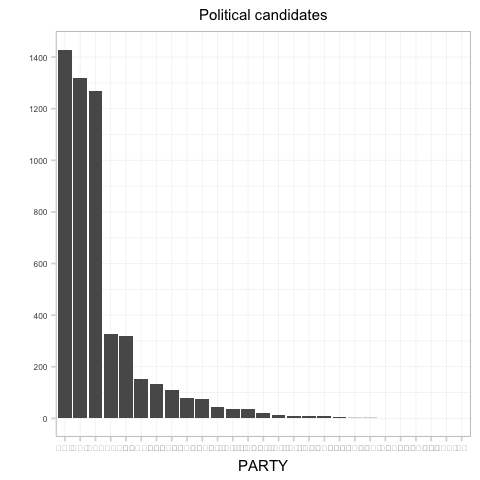

In [8]:
party <- c("みんなの党","維新の党","改革クラブ", "共産党", "欠員", "公明党", "幸福実現党","国民新党", "支持政党なし" ,"次世代の党", "自民党", "自由党" ,"自由連合", "社会民主党" ,"社民党", "諸派" ,"新党改革", "新党大地", "新党日本" ,"生活の党" ,"尊命" ,"日本維新の会", "保守新党", "未来の党", "民主党", "無所属" ,"無所属の会")
number <- c(79, 77, 1, 1318, 0, 45, 0, 21, 0, 38, 1429, 0, 1, 38, 134, 328, 0, 7, 9, 13, 0, 151, 11, 111, 1269, 319, 8 )
df <- data.frame(party, number)
print(df)

#ggplot(data=df, aes(x=party, y=number)) +geom_bar(stat = "identity") 
ggplot(data=df, aes(x=reorder(party, -number), y=number)) +
    geom_bar(stat = "identity") +
    scale_y_continuous(breaks=seq(0,1500,by=200)) +
    labs(title="Political candidates",x="PARTY",y="") +
    theme(
        panel.background = element_rect(fill=NA),
        panel.border = element_rect(fill=NA,color="grey75"),
        axis.ticks = element_line(color="grey85"),
        panel.grid.major = element_line(color = "grey95", size = 0.2),
        panel.grid.minor = element_line(color = "grey95", size = 0.2),
        legend.position = "none",
        plot.title = element_text(hjust=0.5,size=9),
        axis.title = element_text(size=9),
        axis.text = element_text(size=5)
        )

ggsave("analysis_output/political_candidates_R.png",width=4,height=4)


### 5. Repeat the same exercises as 3 & 4, but by restricting the sample to those who won the election. For the bar graph, add a title “Politicians.”

In [9]:
ta_panelw <- subset(ta_panel, select = c("RESULT", "PARTY"))
Politicians <- subset(ta_panelw, (RESULT != 4))

count(Politicians, PARTY)

PARTY,n
みんなの党,21
維新の党,40
共産党,21
公明党,35
国民新党,7
次世代の党,2
自民党,1133
自由連合,1
社会民主党,5
社民党,16


In [10]:
Politicians$PARTY <- as.factor(Politicians$PARTY)
table(Politicians$PARTY)


  みんなの党     維新の党   改革クラブ       共産党         欠員       公明党 
          21           40            0           21            0           35 
  幸福実現党     国民新党 支持政党なし   次世代の党       自民党       自由党 
           0            7            0            2         1133            0 
    自由連合   社会民主党       社民党         諸派     新党改革     新党大地 
           1            5           16            0            0            1 
    新党日本     生活の党         尊命 日本維新の会     保守新党     未来の党 
           2            2            0           46            4            9 
      民主党       無所属   無所属の会 
         681           48            1 

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自民党' で変換に失敗: <e8> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自民党' で変換に失敗: <87> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自民党' で変換に失敗: <aa> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自民党' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自民党' で変換に失敗: <b0> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自民党' で変換に失敗: <91> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自民党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label),

“ 'mbcsToSbcs' 中の '公明党' で変換に失敗: <98> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '公明党' で変換に失敗: <8e> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '公明党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '公明党' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '公明党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <e3> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <81> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <bf> をドットで置き換えました ”Warning mess

“ 'mbcsToSbcs' 中の '国民新党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <e7> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <a4> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <be> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <e4> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <bc> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <e6> をドットで置き換えました ”War

“ 'mbcsToSbcs' 中の '生活の党' で変換に失敗: <e3> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '生活の党' で変換に失敗: <81> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '生活の党' で変換に失敗: <ae> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '生活の党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '生活の党' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '生活の党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自由連合' で変換に失敗: <e8> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自由連合' で変換に失敗: <87> をドットで置き換えました ”Warning me

“ 'mbcsToSbcs' 中の '欠員' で変換に失敗: <ac> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '欠員' で変換に失敗: <a0> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '欠員' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '欠員' で変換に失敗: <93> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '欠員' で変換に失敗: <a1> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '幸福実現党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '幸福実現党' で変換に失敗: <b9> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '幸福実現党' で変換に失敗: <b8> をドットで置き換えました ”Warning message i

“ 'mbcsToSbcs' 中の '新党改革' で変換に失敗: <b9> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党改革' で変換に失敗: <e9> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党改革' で変換に失敗: <9d> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党改革' で変換に失敗: <a9> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '尊命' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '尊命' で変換に失敗: <b0> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '尊命' で変換に失敗: <8a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '尊命' で変換に失敗: <e5> をドットで置き換えました ”Warning message in

“ 'mbcsToSbcs' 中の '維新の党' で変換に失敗: <e3> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '維新の党' で変換に失敗: <81> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '維新の党' で変換に失敗: <ae> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '維新の党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '維新の党' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '維新の党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '公明党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '公明党' で変換に失敗: <85> をドットで置き換えました ”Warning mess

“ 'mbcsToSbcs' 中の '国民新党' で変換に失敗: <9b> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '国民新党' で変換に失敗: <bd> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '国民新党' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '国民新党' で変換に失敗: <b0> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '国民新党' で変換に失敗: <91> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '国民新党' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '国民新党' で変換に失敗: <96> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '国民新党' で変換に失敗: <b0> をドットで置き換えました ”Warning me

“ 'mbcsToSbcs' 中の '新党日本' で変換に失敗: <a5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党日本' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党日本' で変換に失敗: <9c> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党日本' で変換に失敗: <ac> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '生活の党' で変換に失敗: <e7> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '生活の党' で変換に失敗: <94> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '生活の党' で変換に失敗: <9f> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '生活の党' で変換に失敗: <e6> をドットで置き換えました ”Warning me

“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <e3> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <82> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <af> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <e3> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <83> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <a9> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <e3> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <83> をドットで置き換えました ”Wa

“ 'mbcsToSbcs' 中の '諸派' で変換に失敗: <b4> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '諸派' で変換に失敗: <be> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党改革' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党改革' で変換に失敗: <96> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党改革' で変換に失敗: <b0> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党改革' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党改革' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党改革' で変換に失敗: <9a> をドットで置き換えました ”Warning messag

“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <ae> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <e4> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <bc> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '維新の党' で変換に失敗: <e7> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '維新の党' で変換に失敗: <b6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '維新の党' で変換に失敗: <ad> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '維新の党' で変換に失敗: <e6> をドットで置き換えました ”Wa

“ 'mbcsToSbcs' 中の '未来の党' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '未来の党' で変換に失敗: <9d> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '未来の党' で変換に失敗: <a5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '未来の党' で変換に失敗: <e3> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '未来の党' で変換に失敗: <81> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '未来の党' で変換に失敗: <ae> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '未来の党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '未来の党' で変換に失敗: <85> をドットで置き換えました ”Warning me

“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党日本' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党日本' で変換に失敗: <96> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党日本' で変換に失敗: <b0> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党日本' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党日本' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党日本' で変換に失敗: <9a> をドットで置き換えました ”Warning 

“ 'mbcsToSbcs' 中の '無所属の会' で変換に失敗: <ae> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '無所属の会' で変換に失敗: <e4> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '無所属の会' で変換に失敗: <bc> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '無所属の会' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <94> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <b9> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <e9> をドットで置き換えました ”Wa

“ 'mbcsToSbcs' 中の '自由党' で変換に失敗: <e7> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自由党' で変換に失敗: <94> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自由党' で変換に失敗: <b1> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自由党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自由党' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自由党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '諸派' で変換に失敗: <e8> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '諸派' で変換に失敗: <ab> をドットで置き換えました ”Warning message in g

“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <ac> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <e7> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <b6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <ad> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <96> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <b0> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <e3> をドットで置き換

“ 'mbcsToSbcs' 中の '社民党' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社民党' で変換に失敗: <b0> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社民党' で変換に失敗: <91> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社民党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社民党' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社民党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '未来の党' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '未来の党' で変換に失敗: <9c> をドットで置き換えました ”Warning message 

“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <b8> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <96> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <e4> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <bb> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <a3> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <e3> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <81> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <ae> をドットで置き換えました ”Wa

“ 'mbcsToSbcs' 中の '無所属の会' で変換に失敗: <a1> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '無所属の会' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '無所属の会' で変換に失敗: <89> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '無所属の会' で変換に失敗: <80> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '無所属の会' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '無所属の会' で変換に失敗: <b1> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '無所属の会' で変換に失敗: <9e> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '無所属の会' で変換に失敗: <e3> をドットで置き換えました ”Wa

“ 'mbcsToSbcs' 中の '支持政党なし' で変換に失敗: <e3> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '支持政党なし' で変換に失敗: <81> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '支持政党なし' で変換に失敗: <aa> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '支持政党なし' で変換に失敗: <e3> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '支持政党なし' で変換に失敗: <81> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '支持政党なし' で変換に失敗: <97> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自由党' で変換に失敗: <e8> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自由党' で変換に失敗: <87> をドットで置き換えました ”

“ 'mbcsToSbcs' 中の '無所属' で変換に失敗: <80> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '無所属' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '無所属' で変換に失敗: <b1> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '無所属' で変換に失敗: <9e> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <97> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <a5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <e6> をドットで置き換えました ”Warnin

“ 'mbcsToSbcs' 中の '共産党' で変換に失敗: <e7> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '共産党' で変換に失敗: <94> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '共産党' で変換に失敗: <a3> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '共産党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '共産党' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '共産党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社民党' で変換に失敗: <e7> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社民党' で変換に失敗: <a4> をドットで置き換えました ”Warning message in

“ 'mbcsToSbcs' 中の '保守新党' で変換に失敗: <96> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '保守新党' で変換に失敗: <b0> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '保守新党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '保守新党' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '保守新党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <ac> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <a1> をドットで置き換えました ”Warning

“ 'mbcsToSbcs' 中の '新党大地' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党大地' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党大地' で変換に失敗: <a4> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党大地' で変換に失敗: <a7> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党大地' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党大地' で変換に失敗: <9c> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党大地' で変換に失敗: <b0> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '無所属の会' で変換に失敗: <e7> をドットで置き換えました ”Warning m

“ 'mbcsToSbcs' 中の '支持政党なし' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '支持政党なし' で変換に失敗: <8c> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '支持政党なし' で変換に失敗: <81> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '支持政党なし' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '支持政党なし' で変換に失敗: <94> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '支持政党なし' で変換に失敗: <bf> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '支持政党なし' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '支持政党なし' で変換に失敗: <85> をドットで置き換

“ 'mbcsToSbcs' 中の '民主党' で変換に失敗: <b8> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '民主党' で変換に失敗: <bb> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '民主党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '民主党' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '民主党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '無所属' で変換に失敗: <e7> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '無所属' で変換に失敗: <84> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '無所属' で変換に失敗: <a1> をドットで置き換えました ”Warning message in

“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <aa> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <e3> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <81> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <ae> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '共産党' で変換に失敗: <e5> をドットで置き換えました ”Warn

“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '保守新党' で変換に失敗: <e4> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '保守新党' で変換に失敗: <bf> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '保守新党' で変換に失敗: <9d> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '保守新党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '保守新党' で変換に失敗: <ae> をドットで置き換えました ”Warning

“ 'mbcsToSbcs' 中の '自由連合' で変換に失敗: <80> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自由連合' で変換に失敗: <a3> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自由連合' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自由連合' で変換に失敗: <90> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自由連合' で変換に失敗: <88> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党大地' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党大地' で変換に失敗: <96> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党大地' で変換に失敗: <b0> をドットで置き換えました ”Warning me

“ 'mbcsToSbcs' 中の '幸福実現党' で変換に失敗: <9f> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '幸福実現党' で変換に失敗: <e7> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '幸福実現党' で変換に失敗: <8f> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '幸福実現党' で変換に失敗: <be> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '幸福実現党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '幸福実現党' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '幸福実現党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '支持政党なし' で変換に失敗: <e6> をドットで置き換えました ”W

“ 'mbcsToSbcs' 中の '自民党' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自民党' で変換に失敗: <b0> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自民党' で変換に失敗: <91> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自民党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自民党' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自民党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '民主党' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '民主党' で変換に失敗: <b0> をドットで置き換えました ”Warning message in

“ 'mbcsToSbcs' 中の '公明党' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '公明党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <e3> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <81> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <bf> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <e3> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <82> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <93> をドットで置き換えました ”Warnin

“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <be> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <e4> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <bc> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <b0> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <91> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <e4> をドットで置き換えました ”Wa

“ 'mbcsToSbcs' 中の '生活の党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '生活の党' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '生活の党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自由連合' で変換に失敗: <e8> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自由連合' で変換に失敗: <87> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自由連合' で変換に失敗: <aa> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自由連合' で変換に失敗: <e7> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自由連合' で変換に失敗: <94> をドットで置き換えました ”Warning me

“ 'mbcsToSbcs' 中の '欠員' で変換に失敗: <93> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '欠員' で変換に失敗: <a1> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '幸福実現党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '幸福実現党' で変換に失敗: <b9> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '幸福実現党' で変換に失敗: <b8> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '幸福実現党' で変換に失敗: <e7> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '幸福実現党' で変換に失敗: <a6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '幸福実現党' で変換に失敗: <8f> をドットで置き換えました ”Warning 

“ 'mbcsToSbcs' 中の '新党改革' で変換に失敗: <a9> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '尊命' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '尊命' で変換に失敗: <b0> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '尊命' で変換に失敗: <8a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '尊命' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '尊命' で変換に失敗: <91> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '尊命' で変換に失敗: <bd> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自民党' で変換に失敗: <e8> をドットで置き換えました ”Warning message in grid

“ 'mbcsToSbcs' 中の '維新の党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '維新の党' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '維新の党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '公明党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '公明党' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '公明党' で変換に失敗: <ac> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '公明党' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '公明党' で変換に失敗: <98> をドットで置き換えました ”Warning message

“ 'mbcsToSbcs' 中の '国民新党' で変換に失敗: <b0> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '国民新党' で変換に失敗: <91> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '国民新党' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '国民新党' で変換に失敗: <96> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '国民新党' で変換に失敗: <b0> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '国民新党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '国民新党' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '国民新党' で変換に失敗: <9a> をドットで置き換えました ”Warning me

“ 'mbcsToSbcs' 中の '新党日本' で変換に失敗: <ac> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '生活の党' で変換に失敗: <e7> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '生活の党' で変換に失敗: <94> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '生活の党' で変換に失敗: <9f> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '生活の党' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '生活の党' で変換に失敗: <b4> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '生活の党' で変換に失敗: <bb> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '生活の党' で変換に失敗: <e3> をドットで置き換えました ”Warning me

“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <e3> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <83> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <a9> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <e3> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <83> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <96> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '欠員' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '欠員' で変換に失敗: <ac> をドットで置き換えました ”Warning 

“ 'mbcsToSbcs' 中の '新党改革' で変換に失敗: <96> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党改革' で変換に失敗: <b0> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党改革' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党改革' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党改革' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党改革' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党改革' で変換に失敗: <94> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党改革' で変換に失敗: <b9> をドットで置き換えました ”Warning me

“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '維新の党' で変換に失敗: <e7> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '維新の党' で変換に失敗: <b6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '維新の党' で変換に失敗: <ad> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '維新の党' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '維新の党' で変換に失敗: <96> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '維新の党' で変換に失敗: <b0> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '維新の党' で変換に失敗: <e3> をドットで置き換えました ”Warning 

“ 'mbcsToSbcs' 中の '未来の党' で変換に失敗: <e3> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '未来の党' で変換に失敗: <81> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '未来の党' で変換に失敗: <ae> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '未来の党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '未来の党' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '未来の党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '国民新党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '国民新党' で変換に失敗: <9b> をドットで置き換えました ”Warning me

“ 'mbcsToSbcs' 中の '新党日本' で変換に失敗: <96> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党日本' で変換に失敗: <b0> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党日本' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党日本' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党日本' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党日本' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党日本' で変換に失敗: <97> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党日本' で変換に失敗: <a5> をドットで置き換えました ”Warning me

“ 'mbcsToSbcs' 中の '無所属の会' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <94> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <b9> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <e9> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <9d> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <a9> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <e3> をドットで置き換えました ”Wa

“ 'mbcsToSbcs' 中の '自由党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自由党' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自由党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '諸派' で変換に失敗: <e8> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '諸派' で変換に失敗: <ab> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '諸派' で変換に失敗: <b8> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '諸派' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '諸派' で変換に失敗: <b4> をドットで置き換えました ”Warning message in grid

“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <ad> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <96> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <b0> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <e3> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <81> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <ae> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <e4> をドットで置き換

“ 'mbcsToSbcs' 中の '社民党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社民党' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社民党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '未来の党' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '未来の党' で変換に失敗: <9c> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '未来の党' で変換に失敗: <aa> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '未来の党' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '未来の党' で変換に失敗: <9d> をドットで置き換えました ”Warning messa

“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <bb> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <a3> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <e3> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <81> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <ae> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <9a> をドットで置き換えました ”Wa

“ 'mbcsToSbcs' 中の '無所属の会' で変換に失敗: <80> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '無所属の会' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '無所属の会' で変換に失敗: <b1> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '無所属の会' で変換に失敗: <9e> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '無所属の会' で変換に失敗: <e3> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '無所属の会' で変換に失敗: <81> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '無所属の会' で変換に失敗: <ae> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '無所属の会' で変換に失敗: <e4> をドットで置き換えました ”Wa

“ 'mbcsToSbcs' 中の '支持政党なし' で変換に失敗: <e3> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '支持政党なし' で変換に失敗: <81> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '支持政党なし' で変換に失敗: <97> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自由党' で変換に失敗: <e8> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自由党' で変換に失敗: <87> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自由党' で変換に失敗: <aa> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自由党' で変換に失敗: <e7> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自由党' で変換に失敗: <94> をドットで置き換えました ”Warning m

“ 'mbcsToSbcs' 中の '無所属' で変換に失敗: <9e> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <97> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <a5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <9c> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <ac> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <e7> をドットで置き換えまし

“ 'mbcsToSbcs' 中の '共産党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '共産党' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '共産党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社民党' で変換に失敗: <e7> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社民党' で変換に失敗: <a4> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社民党' で変換に失敗: <be> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社民党' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社民党' で変換に失敗: <b0> をドットで置き換えました ”Warning message in

“ 'mbcsToSbcs' 中の '保守新党' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '保守新党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <ac> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <a1> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <e4> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <b8> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <96> をドットで置き換えました ”Warn

“ 'mbcsToSbcs' 中の '新党大地' で変換に失敗: <a7> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党大地' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党大地' で変換に失敗: <9c> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党大地' で変換に失敗: <b0> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '無所属の会' で変換に失敗: <e7> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '無所属の会' で変換に失敗: <84> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '無所属の会' で変換に失敗: <a1> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '無所属の会' で変換に失敗: <e6> をドットで置き換えました ”Warnin

“ 'mbcsToSbcs' 中の '支持政党なし' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '支持政党なし' で変換に失敗: <94> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '支持政党なし' で変換に失敗: <bf> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '支持政党なし' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '支持政党なし' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '支持政党なし' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '支持政党なし' で変換に失敗: <e3> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '支持政党なし' で変換に失敗: <81> をドットで置き換

“ 'mbcsToSbcs' 中の '民主党' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '民主党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '無所属' で変換に失敗: <e7> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '無所属' で変換に失敗: <84> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '無所属' で変換に失敗: <a1> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '無所属' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '無所属' で変換に失敗: <89> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '無所属' で変換に失敗: <80> をドットで置き換えました ”Warning message in

“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <ae> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '共産党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '共産党' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '共産党' で変換に失敗: <b1> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '共産党' で変換に失敗: <e7> をドットで置き換えました ”Warning me

“ 'mbcsToSbcs' 中の '保守新党' で変換に失敗: <e4> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '保守新党' で変換に失敗: <bf> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '保守新党' で変換に失敗: <9d> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '保守新党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '保守新党' で変換に失敗: <ae> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '保守新党' で変換に失敗: <88> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '保守新党' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '保守新党' で変換に失敗: <96> をドットで置き換えました ”Warning me

“ 'mbcsToSbcs' 中の '自由連合' で変換に失敗: <90> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自由連合' で変換に失敗: <88> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党大地' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党大地' で変換に失敗: <96> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党大地' で変換に失敗: <b0> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党大地' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党大地' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党大地' で変換に失敗: <9a> をドットで置き換えました ”Warning me

“ 'mbcsToSbcs' 中の '幸福実現党' で変換に失敗: <be> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '幸福実現党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '幸福実現党' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '幸福実現党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '支持政党なし' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '支持政党なし' で変換に失敗: <94> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '支持政党なし' で変換に失敗: <af> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '支持政党なし' で変換に失敗: <e6> をドットで置き換えました

“ 'mbcsToSbcs' 中の '自民党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自民党' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自民党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '民主党' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '民主党' で変換に失敗: <b0> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '民主党' で変換に失敗: <91> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '民主党' で変換に失敗: <e4> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '民主党' で変換に失敗: <b8> をドットで置き換えました ”Warning message in

“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <81> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <bf> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <e3> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <82> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <93> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <e3> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <81> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <aa> をドットで置き換えました ”Wa

“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <b0> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <91> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <e4> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <b8> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <bb> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <e5> をドットで置き換えました ”Wa

“ 'mbcsToSbcs' 中の '自由連合' で変換に失敗: <e8> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自由連合' で変換に失敗: <87> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自由連合' で変換に失敗: <aa> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自由連合' で変換に失敗: <e7> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自由連合' で変換に失敗: <94> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自由連合' で変換に失敗: <b1> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自由連合' で変換に失敗: <e9> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自由連合' で変換に失敗: <80> をドットで置き換えました ”Warning me

“ 'mbcsToSbcs' 中の '幸福実現党' で変換に失敗: <b9> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '幸福実現党' で変換に失敗: <b8> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '幸福実現党' で変換に失敗: <e7> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '幸福実現党' で変換に失敗: <a6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '幸福実現党' で変換に失敗: <8f> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '幸福実現党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '幸福実現党' で変換に失敗: <ae> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '幸福実現党' で変換に失敗: <9f> をドットで置き換えました ”Wa

“ 'mbcsToSbcs' 中の '尊命' で変換に失敗: <8a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '尊命' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '尊命' で変換に失敗: <91> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '尊命' で変換に失敗: <bd> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自民党' で変換に失敗: <e8> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自民党' で変換に失敗: <87> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自民党' で変換に失敗: <aa> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自民党' で変換に失敗: <e6> をドットで置き換えました ”Warning me

“ 'mbcsToSbcs' 中の '維新の党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '公明党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '公明党' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '公明党' で変換に失敗: <ac> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '公明党' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '公明党' で変換に失敗: <98> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '公明党' で変換に失敗: <8e> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '公明党' で変換に失敗: <e5> をドットで置き換えま

“ 'mbcsToSbcs' 中の '国民新党' で変換に失敗: <91> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '国民新党' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '国民新党' で変換に失敗: <96> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '国民新党' で変換に失敗: <b0> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '国民新党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '国民新党' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '国民新党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <e7> をド

“ 'mbcsToSbcs' 中の '新党日本' で変換に失敗: <ac> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '生活の党' で変換に失敗: <e7> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '生活の党' で変換に失敗: <94> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '生活の党' で変換に失敗: <9f> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '生活の党' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '生活の党' で変換に失敗: <b4> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '生活の党' で変換に失敗: <bb> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '生活の党' で変換に失敗: <e3> をドッ

“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <af> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <e3> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <83> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <a9> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <e3> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <83> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <96> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '欠員' で変換に失敗: <e6

“ 'mbcsToSbcs' 中の '諸派' で変換に失敗: <be> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党改革' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党改革' で変換に失敗: <96> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党改革' で変換に失敗: <b0> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党改革' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党改革' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党改革' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党改革' で変換に失敗: <e6> をドットで

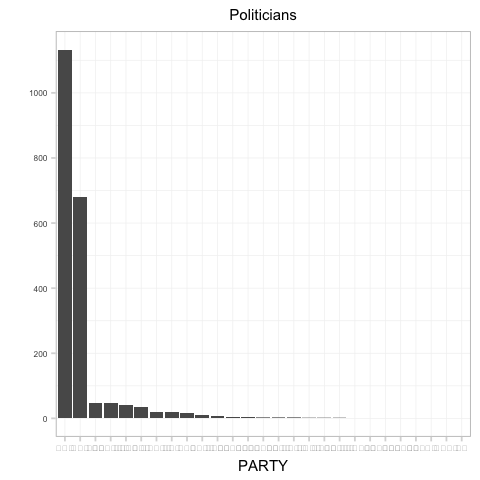

In [11]:
party <- c("みんなの党","維新の党", "改革クラブ", "共産党","欠員", "公明党", "幸福実現党", "国民新党","支持政党なし","次世代の党","自民党","自由党","自由連合","社会民主党","社民党","諸派","新党改革","新党大地","新党日本","生活の党","尊命","日本維新の会","保守新党","未来の党","民主党","無所属","無所属の会")
number <- c(21, 40, 0,21,0,35, 0,7, 0, 2, 1133, 0, 1, 5, 16,0, 0, 1, 2,2  ,0 ,46 ,4  ,9,681, 48, 1  )
df <- data.frame(party, number)
#print(df)

ggplot(data=df, aes(x=reorder(party, -number), y=number)) +
    geom_bar(stat = "identity") +
    scale_y_continuous(breaks=seq(0,1500,by=200)) +
    labs(title="Politicians",x="PARTY",y="") +
    theme(
        panel.background = element_rect(fill=NA),
        panel.border = element_rect(fill=NA,color="grey75"),
        axis.ticks = element_line(color="grey85"),
        panel.grid.major = element_line(color = "grey95", size = 0.2),
        panel.grid.minor = element_line(color = "grey95", size = 0.2),
        legend.position = "none",
        plot.title = element_text(hjust=0.5,size=9),
        axis.title = element_text(size=9),
        axis.text = element_text(size=5)
        )

ggsave("analysis_output/politicians_R.png",width=4,height=4)

### 6. Repeat the same exercises as 3 & 4, but by distinguishing males and females for each party (you have to put both bar graphs in the same figure). Which party has the largest female candidates in the data?

In [12]:
#ta_panelw <- subset(ta_panel, select = c("RESULT", "PARTY"))
#Politicians <- subset(ta_panelw, (RESULT != 4))

ta_panelm <- subset(ta_panel, (SEX==1))
ta_panelf <- subset(ta_panel, (SEX==2))

table(ta_panelm$PARTY)
table(ta_panelf$PARTY)


  みんなの党     維新の党   改革クラブ       共産党         欠員       公明党 
          73           68            1          772            0           35 
  幸福実現党     国民新党 支持政党なし   次世代の党       自民党       自由党 
           0           20            0           36         1060            0 
    自由連合   社会民主党       社民党         諸派     新党改革     新党大地 
           0           28           60          249            0            5 
    新党日本     生活の党         尊命 日本維新の会     保守新党     未来の党 
           9           11            0          139            0           85 
      民主党       無所属   無所属の会 
         881          208            0 


  みんなの党     維新の党   改革クラブ       共産党         欠員       公明党 
           6            9            0          246            0            0 
  幸福実現党     国民新党 支持政党なし   次世代の党       自民党       自由党 
           0            1            0            2           92            0 
    自由連合   社会民主党       社民党         諸派     新党改革     新党大地 
           0           10           12           75            0            2 
    新党日本     生活の党         尊命 日本維新の会     保守新党     未来の党 
           0            2            0           12            0           26 
      民主党       無所属   無所属の会 
         121           25            0 

Male : 自民党

Female : 共産党

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <e3> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <81> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <bf> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <e3> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <82> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <93> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <e3> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsA

“ 'mbcsToSbcs' 中の '国民新党' で変換に失敗: <9b> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '国民新党' で変換に失敗: <bd> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '国民新党' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '国民新党' で変換に失敗: <b0> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '国民新党' で変換に失敗: <91> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '国民新党' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '国民新党' で変換に失敗: <96> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '国民新党' で変換に失敗: <b0> をドットで置き換えました ”Warning me

“ 'mbcsToSbcs' 中の '諸派' で変換に失敗: <b8> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '諸派' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '諸派' で変換に失敗: <b4> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '諸派' で変換に失敗: <be> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党大地' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党大地' で変換に失敗: <96> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党大地' で変換に失敗: <b0> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党大地' で変換に失敗: <e5> をドットで置き換えました ”Warning message in

“ 'mbcsToSbcs' 中の '未来の党' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '未来の党' で変換に失敗: <9d> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '未来の党' で変換に失敗: <a5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '未来の党' で変換に失敗: <e3> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '未来の党' で変換に失敗: <81> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '未来の党' で変換に失敗: <ae> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '未来の党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '未来の党' で変換に失敗: <85> をドットで置き換えました ”Warning me

“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <82> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <af> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <e3> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <83> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <a9> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <e3> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <83> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <96> をドットで置き換えました ”Wa

“ 'mbcsToSbcs' 中の '自民党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <e7> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <a4> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <be> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <e4> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <bc> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <e6> をドットで置き換えました ”Warn

“ 'mbcsToSbcs' 中の '生活の党' で変換に失敗: <e3> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '生活の党' で変換に失敗: <81> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '生活の党' で変換に失敗: <ae> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '生活の党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '生活の党' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '生活の党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <97> をドットで置き換えました ”Warnin

“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <81> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <aa> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <e3> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <81> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <ae> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <9a> をドットで置き換えました ”Wa

“ 'mbcsToSbcs' 中の '国民新党' で変換に失敗: <b0> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '国民新党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '国民新党' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '国民新党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <ac> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <a1> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <e4> をドットで置き換えました ”Warnin

“ 'mbcsToSbcs' 中の '新党大地' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党大地' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党大地' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党大地' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党大地' で変換に失敗: <a4> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党大地' で変換に失敗: <a7> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党大地' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党大地' で変換に失敗: <9c> をドットで置き換えました ”Warning me

“ 'mbcsToSbcs' 中の '未来の党' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '未来の党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '民主党' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '民主党' で変換に失敗: <b0> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '民主党' で変換に失敗: <91> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '民主党' で変換に失敗: <e4> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '民主党' で変換に失敗: <b8> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '民主党' で変換に失敗: <bb> をドットで置き換えました ”Warning message 

“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <96> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '共産党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '共産党' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '共産党' で変換に失敗: <b1> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '共産党' で変換に失敗: <e7> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '共産党' で変換に失敗: <94> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '共産党' で変換に失敗: <a3> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '共産党' で変換に失敗: <e5> をドットで置き換えました ”Warning message 

“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <b0> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <91> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <e4> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <b8> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <bb> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <85> をドットで置き換えました ”Wa

“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <97> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <a5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <9c> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <ac> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <e7> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <b6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <ad> をドットで置き換

“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '維新の党' で変換に失敗: <e7> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '維新の党' で変換に失敗: <b6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '維新の党' で変換に失敗: <ad> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '維新の党' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '維新の党' で変換に失敗: <96> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '維新の党' で変換に失敗: <b0> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '維新の党' で変換に失敗: <e3> をドットで置き換えました ”Warning m

“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <e4> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <b8> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <96> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <e4> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <bb> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <a3> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <e3> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <81> をドットで置き換えました ”Wa

“ 'mbcsToSbcs' 中の '新党大地' で変換に失敗: <9c> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党大地' で変換に失敗: <b0> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党日本' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党日本' で変換に失敗: <96> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党日本' で変換に失敗: <b0> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党日本' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党日本' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党日本' で変換に失敗: <9a> をドットで置き換えました ”Warning me

“ 'mbcsToSbcs' 中の '民主党' で変換に失敗: <bb> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '民主党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '民主党' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '民主党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '無所属' で変換に失敗: <e7> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '無所属' で変換に失敗: <84> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '無所属' で変換に失敗: <a1> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '無所属' で変換に失敗: <e6> をドットで置き換えました ”Warning message in

“ 'mbcsToSbcs' 中の '共産党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '共産党' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '共産党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '公明党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '公明党' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '公明党' で変換に失敗: <ac> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '公明党' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '公明党' で変換に失敗: <98> をドットで置き換えました ”Warning message in

“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社民党' で変換に失敗: <e7> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社民党' で変換に失敗: <a4> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社民党' で変換に失敗: <be> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社民党' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社民党' で変換に失敗: <b0> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社民党' で変換に失敗: <91> をドットで置き換えました ”Warning messag

“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <ad> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <96> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <b0> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <e3> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <81> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <ae> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <e4> をドットで置き換

“ 'mbcsToSbcs' 中の '維新の党' で変換に失敗: <e3> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '維新の党' で変換に失敗: <81> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '維新の党' で変換に失敗: <ae> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '維新の党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '維新の党' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '維新の党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <94> をドットで置き換えました ”Warning 

“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <81> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <ae> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自民党' で変換に失敗: <e8> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自民党' で変換に失敗: <87> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自民党' で変換に失敗: <aa> をドットで置き換えました ”Warning 

“ 'mbcsToSbcs' 中の '新党日本' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党日本' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党日本' で変換に失敗: <97> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党日本' で変換に失敗: <a5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党日本' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党日本' で変換に失敗: <9c> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党日本' で変換に失敗: <ac> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '生活の党' で変換に失敗: <e7> をドットで置き換えました ”Warning me

“ 'mbcsToSbcs' 中の '無所属' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '無所属' で変換に失敗: <89> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '無所属' で変換に失敗: <80> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '無所属' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '無所属' で変換に失敗: <b1> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '無所属' で変換に失敗: <9e> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <e3> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <81> をドットで置き換えました ”Warning messag

“ 'mbcsToSbcs' 中の '公明党' で変換に失敗: <98> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '公明党' で変換に失敗: <8e> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '公明党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '公明党' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '公明党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '国民新党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '国民新党' で変換に失敗: <9b> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '国民新党' で変換に失敗: <bd> をドットで置き換えました ”Warning message

“ 'mbcsToSbcs' 中の '社民党' で変換に失敗: <91> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社民党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社民党' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社民党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '諸派' で変換に失敗: <e8> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '諸派' で変換に失敗: <ab> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '諸派' で変換に失敗: <b8> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '諸派' で変換に失敗: <e6> をドットで置き換えました ”Warning message in gri

“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <e4> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <bc> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '未来の党' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '未来の党' で変換に失敗: <9c> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '未来の党' で変換に失敗: <aa> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '未来の党' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '未来の党' で変換に失敗: <9d> をドットで置き換えました ”Warn

“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <94> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <b9> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <e9> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <9d> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <a9> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <e3> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <82> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <af> をドットで置き換えました ”Wa

“ 'mbcsToSbcs' 中の '自民党' で変換に失敗: <aa> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自民党' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自民党' で変換に失敗: <b0> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自民党' で変換に失敗: <91> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自民党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自民党' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自民党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <e7> をドットで置き換えました ”Warning message 

“ 'mbcsToSbcs' 中の '生活の党' で変換に失敗: <e7> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '生活の党' で変換に失敗: <94> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '生活の党' で変換に失敗: <9f> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '生活の党' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '生活の党' で変換に失敗: <b4> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '生活の党' で変換に失敗: <bb> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '生活の党' で変換に失敗: <e3> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '生活の党' で変換に失敗: <81> をドットで置き換えました ”Warning me

“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <81> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <bf> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <e3> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <82> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <93> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <e3> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <81> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <aa> をドットで置き換えました ”Wa

“ 'mbcsToSbcs' 中の '国民新党' で変換に失敗: <bd> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '国民新党' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '国民新党' で変換に失敗: <b0> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '国民新党' で変換に失敗: <91> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '国民新党' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '国民新党' で変換に失敗: <96> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '国民新党' で変換に失敗: <b0> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '国民新党' で変換に失敗: <e5> をドットで置き換えました ”Warning me

“ 'mbcsToSbcs' 中の '諸派' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '諸派' で変換に失敗: <b4> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '諸派' で変換に失敗: <be> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党大地' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党大地' で変換に失敗: <96> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党大地' で変換に失敗: <b0> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党大地' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党大地' で変換に失敗: <85> をドットで置き換えました ”Warning message 

“ 'mbcsToSbcs' 中の '未来の党' で変換に失敗: <9d> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '未来の党' で変換に失敗: <a5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '未来の党' で変換に失敗: <e3> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '未来の党' で変換に失敗: <81> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '未来の党' で変換に失敗: <ae> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '未来の党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '未来の党' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '未来の党' で変換に失敗: <9a> をドットで置き換えました ”Warning me

“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <af> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <e3> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <83> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <a9> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <e3> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <83> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <96> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '共産党' で変換に失敗: <e5> をドットで置き換えました ”Warn

“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <e7> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <a4> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <be> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <e4> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <bc> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <b0> をドットで置き換えました ”Wa

“ 'mbcsToSbcs' 中の '生活の党' で変換に失敗: <81> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '生活の党' で変換に失敗: <ae> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '生活の党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '生活の党' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '生活の党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <97> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <a5> をドットで置き換えました ”Warn

“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <aa> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <e3> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <81> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <ae> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '維新の党' で変換に失敗: <e7> をドットで置き換えました ”War

“ 'mbcsToSbcs' 中の '国民新党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '国民新党' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '国民新党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <ac> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <a1> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <e4> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <b8> をドットで置き換えました ”Warni

“ 'mbcsToSbcs' 中の '新党大地' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党大地' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党大地' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党大地' で変換に失敗: <a4> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党大地' で変換に失敗: <a7> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党大地' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党大地' で変換に失敗: <9c> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党大地' で変換に失敗: <b0> をドットで置き換えました ”Warning me

“ 'mbcsToSbcs' 中の '未来の党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '民主党' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '民主党' で変換に失敗: <b0> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '民主党' で変換に失敗: <91> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '民主党' で変換に失敗: <e4> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '民主党' で変換に失敗: <b8> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '民主党' で変換に失敗: <bb> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '民主党' で変換に失敗: <e5> をドットで置き換えました ”Warning message i

“ 'mbcsToSbcs' 中の '共産党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '共産党' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '共産党' で変換に失敗: <b1> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '共産党' で変換に失敗: <e7> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '共産党' で変換に失敗: <94> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '共産党' で変換に失敗: <a3> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '共産党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '共産党' で変換に失敗: <85> をドットで置き換えました ”Warning message in

“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <b0> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <91> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <e4> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <b8> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <bb> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <9a> をドットで置き換えました ”Wa

“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <a5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <9c> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <ac> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <e7> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <b6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <ad> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <e6> をドットで置き換

“ 'mbcsToSbcs' 中の '維新の党' で変換に失敗: <e7> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '維新の党' で変換に失敗: <b6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '維新の党' で変換に失敗: <ad> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '維新の党' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '維新の党' で変換に失敗: <96> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '維新の党' で変換に失敗: <b0> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '維新の党' で変換に失敗: <e3> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '維新の党' で変換に失敗: <81> をドットで置き換えました ”Warning me

“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <b8> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <96> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <e4> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <bb> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <a3> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <e3> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <81> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <ae> をドットで置き換えました ”Wa

“ 'mbcsToSbcs' 中の '新党大地' で変換に失敗: <b0> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党日本' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党日本' で変換に失敗: <96> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党日本' で変換に失敗: <b0> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党日本' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党日本' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党日本' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党日本' で変換に失敗: <e6> をドットで置き換えました ”Warning me

“ 'mbcsToSbcs' 中の '民主党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '民主党' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '民主党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '無所属' で変換に失敗: <e7> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '無所属' で変換に失敗: <84> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '無所属' で変換に失敗: <a1> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '無所属' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '無所属' で変換に失敗: <89> をドットで置き換えました ”Warning message in

“ 'mbcsToSbcs' 中の '共産党' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '共産党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '公明党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '公明党' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '公明党' で変換に失敗: <ac> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '公明党' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '公明党' で変換に失敗: <98> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '公明党' で変換に失敗: <8e> をドットで置き換えました ”Warning message in

“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社民党' で変換に失敗: <e7> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社民党' で変換に失敗: <a4> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社民党' で変換に失敗: <be> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社民党' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社民党' で変換に失敗: <b0> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社民党' で変換に失敗: <91> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社民党' で変換に失敗: <e5> をドットで置き換えました ”Warning message 

“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <96> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <b0> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <e3> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <81> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <ae> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <e4> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <bc> をドットで置き換

“ 'mbcsToSbcs' 中の '維新の党' で変換に失敗: <81> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '維新の党' で変換に失敗: <ae> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '維新の党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '維新の党' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '維新の党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <94> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <b9> をドットで置き換えました ”Warning

“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <ae> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自民党' で変換に失敗: <e8> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自民党' で変換に失敗: <87> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自民党' で変換に失敗: <aa> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自民党' で変換に失敗: <e6> をドットで置き換えました ”Warning me

“ 'mbcsToSbcs' 中の '新党日本' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党日本' で変換に失敗: <97> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党日本' で変換に失敗: <a5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党日本' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党日本' で変換に失敗: <9c> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党日本' で変換に失敗: <ac> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '生活の党' で変換に失敗: <e7> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '生活の党' で変換に失敗: <94> をドットで置き換えました ”Warning me

“ 'mbcsToSbcs' 中の '無所属' で変換に失敗: <89> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '無所属' で変換に失敗: <80> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '無所属' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '無所属' で変換に失敗: <b1> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '無所属' で変換に失敗: <9e> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <e3> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <81> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <bf> をドットで置き換えました ”War

“ 'mbcsToSbcs' 中の '公明党' で変換に失敗: <98> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '公明党' で変換に失敗: <8e> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '公明党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '公明党' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '公明党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '国民新党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '国民新党' で変換に失敗: <9b> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '国民新党' で変換に失敗: <bd> をドットで置き換

“ 'mbcsToSbcs' 中の '社民党' で変換に失敗: <b0> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社民党' で変換に失敗: <91> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社民党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社民党' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社民党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '諸派' で変換に失敗: <e8> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '諸派' で変換に失敗: <ab> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '諸派' で変換に失敗: <b8> をドットで置き換えました ”

“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <81> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <ae> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <e4> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <bc> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '未来の党' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '未来の党' で変換に失敗: <9c> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '未来の党' で変換に失敗

“ 'mbcsToSbcs' 中の '維新の党' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '維新の党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <94> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <b9> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <e9> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <9d> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <a9> をドットで置き換えました ”Warn

“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自民党' で変換に失敗: <e8> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自民党' で変換に失敗: <87> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自民党' で変換に失敗: <aa> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自民党' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自民党' で変換に失敗: <b0> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自民党' で変換に失敗: <91> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自民党' で変換に失敗: <e5> をドットで置き換えました ”Warning message 

“ 'mbcsToSbcs' 中の '新党日本' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党日本' で変換に失敗: <9c> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党日本' で変換に失敗: <ac> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '生活の党' で変換に失敗: <e7> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '生活の党' で変換に失敗: <94> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '生活の党' で変換に失敗: <9f> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '生活の党' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '生活の党' で変換に失敗: <b4> をドットで置き換えました ”Warning me

“ 'mbcsToSbcs' 中の '無所属' で変換に失敗: <b1> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '無所属' で変換に失敗: <9e> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <e3> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <81> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <bf> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <e3> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <82> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <93> をドットで置き換えました ”Warnin

“ 'mbcsToSbcs' 中の '公明党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '国民新党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '国民新党' で変換に失敗: <9b> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '国民新党' で変換に失敗: <bd> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '国民新党' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '国民新党' で変換に失敗: <b0> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '国民新党' で変換に失敗: <91> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '国民新党' で変換に失敗: <e6> をドットで置き換えました ”Warning mes

“ 'mbcsToSbcs' 中の '諸派' で変換に失敗: <e8> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '諸派' で変換に失敗: <ab> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '諸派' で変換に失敗: <b8> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '諸派' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '諸派' で変換に失敗: <b4> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '諸派' で変換に失敗: <be> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党大地' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党大地' で変換に失敗: <96> をドットで置き換えました ”Warning message in gri

“ 'mbcsToSbcs' 中の '未来の党' で変換に失敗: <9c> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '未来の党' で変換に失敗: <aa> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '未来の党' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '未来の党' で変換に失敗: <9d> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '未来の党' で変換に失敗: <a5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '未来の党' で変換に失敗: <e3> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '未来の党' で変換に失敗: <81> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '未来の党' で変換に失敗: <ae> をドットで置き換えました ”Warning me

“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <a9> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <e3> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <82> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <af> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <e3> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <83> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <a9> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <e3> をドットで置き換えました ”Wa

“ 'mbcsToSbcs' 中の '自民党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自民党' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自民党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <e7> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <a4> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <be> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <e4> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <bc> をドットで置き換えました ”Warning 

“ 'mbcsToSbcs' 中の '生活の党' で変換に失敗: <b4> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '生活の党' で変換に失敗: <bb> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '生活の党' で変換に失敗: <e3> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '生活の党' で変換に失敗: <81> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '生活の党' で変換に失敗: <ae> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '生活の党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '生活の党' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '生活の党' で変換に失敗: <9a> をドットで置き換えました ”Warning me

“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <93> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <e3> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <81> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <aa> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <e3> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <81> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <ae> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <e5> をドットで置き換えました ”Wa

“ 'mbcsToSbcs' 中の '国民新党' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '国民新党' で変換に失敗: <96> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '国民新党' で変換に失敗: <b0> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '国民新党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '国民新党' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '国民新党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <ac> をドットで置き換えました ”Warning 

“ 'mbcsToSbcs' 中の '新党大地' で変換に失敗: <96> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党大地' で変換に失敗: <b0> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党大地' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党大地' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党大地' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党大地' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党大地' で変換に失敗: <a4> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党大地' で変換に失敗: <a7> をドットで置き換えました ”Warning me

“ 'mbcsToSbcs' 中の '未来の党' で変換に失敗: <ae> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '未来の党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '未来の党' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '未来の党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '民主党' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '民主党' で変換に失敗: <b0> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '民主党' で変換に失敗: <91> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '民主党' で変換に失敗: <e4> をドットで置き換えました ”Warning messag

“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <e3> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <83> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <96> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '共産党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '共産党' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '共産党' で変換に失敗: <b1> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '共産党' で変換に失敗: <e7> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '共産党' で変換に失敗: <94> をドットで置き換えました ”Warning mess

“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <bc> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <b0> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <91> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <e4> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <b8> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <bb> をドットで置き換えました ”Wa

“ 'mbcsToSbcs' 中の '生活の党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <97> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <a5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <9c> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <ac> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <e7> をドットで置き換えま

“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '維新の党' で変換に失敗: <e7> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '維新の党' で変換に失敗: <b6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '維新の党' で変換に失敗: <ad> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '維新の党' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '維新の党' で変換に失敗: <96> をドットで置き換えました ”Warning

“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <ac> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <a1> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <e4> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <b8> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <96> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <e4> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <bb> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <a3> をドットで置き換えました ”Wa

“ 'mbcsToSbcs' 中の '新党大地' で変換に失敗: <a7> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党大地' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党大地' で変換に失敗: <9c> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党大地' で変換に失敗: <b0> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党日本' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党日本' で変換に失敗: <96> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党日本' で変換に失敗: <b0> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党日本' で変換に失敗: <e5> をドットで置き換えました ”Warning me

“ 'mbcsToSbcs' 中の '民主党' で変換に失敗: <e4> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '民主党' で変換に失敗: <b8> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '民主党' で変換に失敗: <bb> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '民主党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '民主党' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '民主党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '無所属' で変換に失敗: <e7> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '無所属' で変換に失敗: <84> をドットで置き換えました ”Warning message in

“ 'mbcsToSbcs' 中の '共産党' で変換に失敗: <94> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '共産党' で変換に失敗: <a3> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '共産党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '共産党' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '共産党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '公明党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '公明党' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '公明党' で変換に失敗: <ac> をドットで置き換えました ”Warning message in

“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <bb> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社会民主党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社民党' で変換に失敗: <e7> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社民党' で変換に失敗: <a4> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社民党' で変換に失敗: <be> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社民党' で変換に失敗: <e6> をドットで置き換えました ”Warning me

“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <e7> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <b6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <ad> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <96> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <b0> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <e3> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <81> をドットで置き換

“ 'mbcsToSbcs' 中の '維新の党' で変換に失敗: <96> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '維新の党' で変換に失敗: <b0> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '維新の党' で変換に失敗: <e3> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '維新の党' で変換に失敗: <81> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '維新の党' で変換に失敗: <ae> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '維新の党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '維新の党' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '維新の党' で変換に失敗: <9a> をドットで置き換えました ”Warning me

“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <a3> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <e3> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <81> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <ae> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '次世代の党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自民党' で変換に失敗: <e8> をドットで置き換えました ”Warn

“ 'mbcsToSbcs' 中の '新党日本' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党日本' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党日本' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党日本' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党日本' で変換に失敗: <97> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党日本' で変換に失敗: <a5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党日本' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党日本' で変換に失敗: <9c> をドットで置き換えました ”Warning me

“ 'mbcsToSbcs' 中の '無所属' で変換に失敗: <84> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '無所属' で変換に失敗: <a1> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '無所属' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '無所属' で変換に失敗: <89> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '無所属' で変換に失敗: <80> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '無所属' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '無所属' で変換に失敗: <b1> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '無所属' で変換に失敗: <9e> をドットで置き換えました ”Warning message in

“ 'mbcsToSbcs' 中の '公明党' で変換に失敗: <ac> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '公明党' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '公明党' で変換に失敗: <98> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '公明党' で変換に失敗: <8e> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '公明党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '公明党' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '公明党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '国民新党' で変換に失敗: <e5> をドットで置き換えました ”Warning message i

“ 'mbcsToSbcs' 中の '社民党' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社民党' で変換に失敗: <b0> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社民党' で変換に失敗: <91> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社民党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社民党' で変換に失敗: <85> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '社民党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '諸派' で変換に失敗: <e8> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '諸派' で変換に失敗: <ab> をドットで置き換えました ”Warning message in g

“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <81> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <ae> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <e4> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <bc> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '未来の党' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '未来の党' で変換に失敗: <9c> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '未来の党' で変換に失敗: <aa> をドットで置き換えました ”

“ 'mbcsToSbcs' 中の '維新の党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <94> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <b9> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <e9> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <9d> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <a9> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '改革クラブ' で変換に失敗: <e3> をドットで置き換えました ”War

“ 'mbcsToSbcs' 中の '自民党' で変換に失敗: <e8> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自民党' で変換に失敗: <87> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自民党' で変換に失敗: <aa> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自民党' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自民党' で変換に失敗: <b0> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自民党' で変換に失敗: <91> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自民党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '自民党' で変換に失敗: <85> をドットで置き換えました ”Warning message in

“ 'mbcsToSbcs' 中の '新党日本' で変換に失敗: <9c> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党日本' で変換に失敗: <ac> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '生活の党' で変換に失敗: <e7> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '生活の党' で変換に失敗: <94> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '生活の党' で変換に失敗: <9f> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '生活の党' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '生活の党' で変換に失敗: <b4> をドットで置き換えました ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '生活の党' で変換に失敗: <bb> をドットで置き換えました ”Warning me

“ 'mbcsToSbcs' 中の '無所属' で変換に失敗: <9e> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <e3> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <81> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <bf> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <e3> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <82> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <93> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の 'みんなの党' で変換に失敗: <e

“ 'mbcsToSbcs' 中の '公明党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '国民新党' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '国民新党' で変換に失敗: <9b> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '国民新党' で変換に失敗: <bd> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '国民新党' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '国民新党' で変換に失敗: <b0> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '国民新党' で変換に失敗: <91> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '国民新党' で変換に失敗: <e6> をドット

“ 'mbcsToSbcs' 中の '社民党' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '諸派' で変換に失敗: <e8> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '諸派' で変換に失敗: <ab> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '諸派' で変換に失敗: <b8> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '諸派' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '諸派' で変換に失敗: <b4> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '諸派' で変換に失敗: <be> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '新党大地' で変換に失敗: <e6> をドットで置き換えました ”Wa

“ 'mbcsToSbcs' 中の '日本維新の会' で変換に失敗: <9a> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '未来の党' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '未来の党' で変換に失敗: <9c> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '未来の党' で変換に失敗: <aa> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '未来の党' で変換に失敗: <e6> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '未来の党' で変換に失敗: <9d> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '未来の党' で変換に失敗: <a5> をドットで置き換えました ”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ 'mbcsToSbcs' 中の '未来の党' で変換に失敗: <e3> を

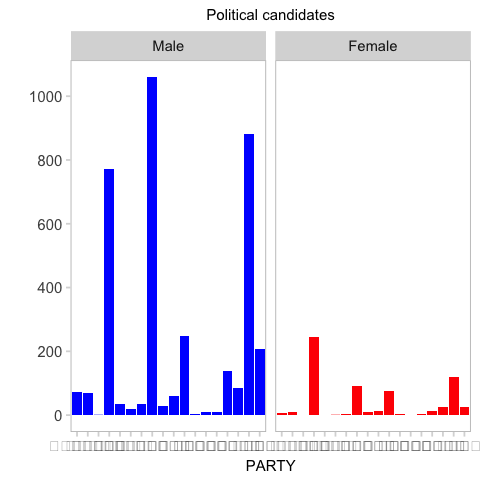

In [13]:
ta_panel2 <- subset(ta_panel, (!is.na(SEX)))
ta_panel2$SEX <- factor(ta_panel2$SEX)
#ta_panel2$number <- count(ta_panel2$PARTY)
levels(ta_panel2$SEX) <- c("Male","Female")

ggplot(data=ta_panel2,aes(PARTY,fill=factor(SEX))) +
    geom_bar() +
    scale_y_continuous(breaks=seq(0,1250,by=200)) +
    facet_grid(. ~ SEX) +
    scale_fill_manual(values=c("blue","red")) + 
    labs(title="Political candidates",x="PARTY",y="") +
    theme(
        panel.background = element_rect(fill=NA),
        panel.border = element_rect(fill=NA,color="grey75"),
        axis.ticks = element_line(color="grey85"),
        #panel.grid.major = element_line(color = "grey95", size = 0.2),
        #panel.grid.minor = element_line(color = "grey95", size = 0.2),
        legend.position = "none",
        plot.title = element_text(hjust=0.5,size=9),
        axis.title = element_text(size=9),
        axis.text = element_text(size=9)
        )

ggsave("analysis_output/political_candidates_bysex_R.png",width=4,height=4)


### 7. Compute the average level of not supporting fiscal policies for fiscal consolidation using yn_fiscalpol (note that the variable takes larger values as individuals get not supporting it) for each TERM, and plot it as a bar graph. What tendency do you observe here? What do you think would be the endogeneity issue (i.e., the correlation between yn fiscalpol and TERM is not necessarily causal) here? Discuss. 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,Sum
1,243,91,48,36,34,27,17,6,8,11,7,4,3,1,0,0,0,536
2,446,209,92,73,66,55,44,32,14,12,12,3,1,2,1,0,1,1063
3,745,110,58,51,23,26,19,12,6,2,1,2,1,1,0,1,0,1058
4,251,70,26,28,19,12,11,4,1,2,1,1,0,0,0,0,0,426
5,157,14,5,5,5,2,2,1,0,0,0,0,1,0,0,0,0,192
99,45,8,4,3,3,4,1,1,1,1,1,4,0,0,1,0,0,77
Sum,1887,502,233,196,150,126,94,56,30,28,22,14,6,4,2,1,1,3352


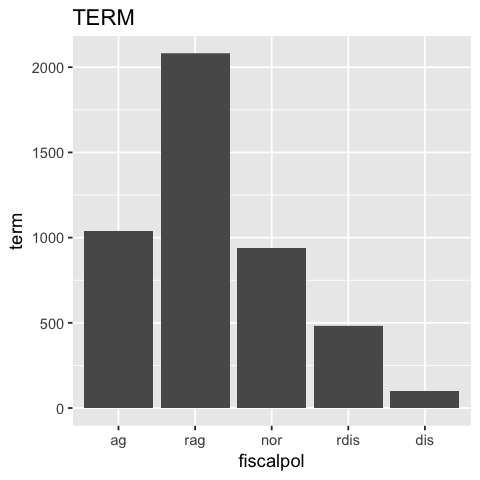

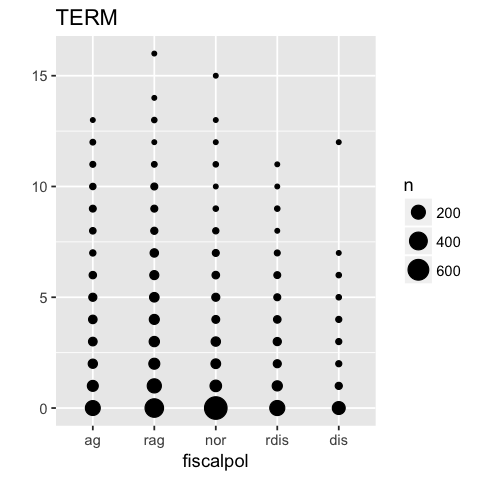

In [14]:
fis.term.tab <- table(fis=ta_panel2$yn_fiscalpol , term = ta_panel2$TERM)
addmargins(fis.term.tab)

ta_panel2 <- subset(ta_panel, (yn_fiscalpol != 99) )
ta_panel2$ELECYEAR <- factor(ta_panel2$ELECYEAR)
levels(ta_panel2$ELECYEAR) <- c("2009","2012","2014")

term <- subset(ta_panel, (yn_fiscalpol != 99))
term$yn_fiscalpol <- factor(term$yn_fiscalpol)
levels(term$yn_fiscalpol) <- c("ag","rag","nor","rdis","dis")

ggplot(data=term,aes(x=yn_fiscalpol, y=TERM)) +
    geom_bar(stat = "identity") +
    labs(title="TERM",x="fiscalpol",y="term") 

ggplot(data=term,aes(x=yn_fiscalpol, y=TERM)) +
    geom_count() +
    labs(title="TERM",x="fiscalpol",y="") 


ここで、設問文は「当面は財政再建のために歳出を抑えるのではなく、景気対策のために財政出動を行うべきだ」、選択肢は、「1.賛成」〜「5.反対」を指す。

グラフから、景気対策のために財政出動を行うべきという主張に賛成する候補者の当選回数が多いことが読み取れる。

では、財政出動を主張すると選挙に当選しやすくなるのだろうか。日本全体として、2009年から2014年にかけて、リーマンショックの影響を強く受けた後、数年をかけて改善してきたというマクロ経済トレンドがある。そのため、多くの候補者が財政出動を主張していた可能性がある。このように景気トレンドが候補者の主張と当選回数の双方に影響を及ぼしている可能性があるとき、因果関係を特定することは難しい。

### 8. Regress yn fiscalpol on TERM (Model 1).      Next, regress the same model but with SEX, AGE, and INCUMBENT as additional controls (Model 2).     Add individual and election year fixed effect to Model 1 (Model 3).      Add AGE and INCUMBENT to Model 3 (Model 4). Finally, save the table as a tex file. 

- Why can you not include SEX in Model 4?
- What do you find by comparing the results in Model 2 and Model 3? Discuss the possible reason why you got a different result in Model 3.
- Can you instead say something about the effect of INCUMBENT on yn fiscalpol? Discuss.

In [15]:
ta_panel2 <- subset(ta_panel,(yn_fiscalpol != 99) )
ta_panel3 <- subset(ta_panel,(yn_fiscalpol != 99) )

ta_panel2$INCUMB <- ifelse(ta_panel2$INCUMB ==3 , 1, 0)
table(inc = ta_panel2$INCUMB , bef = ta_panel3$INCUMB)

reg1 <- lm(TERM ~ yn_fiscalpol, data=ta_panel2)
reg2 <- lm(TERM ~ yn_fiscalpol + SEX + AGE + INCUMB, data=ta_panel2)

stargazer(reg1,reg2, title="OLS Regressions",align=TRUE,type = "text")


   bef
inc    1    2    3
  0 1842  264    0
  1    0    0 1169


OLS Regressions
                                    Dependent variable:                
                    ---------------------------------------------------
                                           TERM                        
                               (1)                       (2)           
-----------------------------------------------------------------------
yn_fiscalpol                -0.412***                 -0.077***        
                             (0.037)                   (0.027)         
                                                                       
SEX                                                   -0.450***        
                                                       (0.079)         
                                                                       
AGE                                                   0.062***         
                                                       (0.003)         
                                               

In [16]:
reg3 <- felm(TERM ~ yn_fiscalpol | uid + ELECYEAR,data=ta_panel2)
reg4 <- felm(TERM ~ yn_fiscalpol + AGE + INCUMB | uid + ELECYEAR,data=ta_panel2)
reg4. <- lm(yn_fiscalpol ~ INCUMB ,data=ta_panel2)

stargazer(reg3,reg4, reg4., title="OLS Regressions",align=TRUE,type = "text")

stargazer(reg1,reg2,reg3,reg4, title="OLS Regressions",align=TRUE,out="analysis_output/ols_results_R.tex")




OLS Regressions
                                         Dependent variable:                     
                    -------------------------------------------------------------
                                   TERM                       yn_fiscalpol       
                                   felm                            OLS           
                           (1)               (2)                   (3)           
---------------------------------------------------------------------------------
yn_fiscalpol             -0.014           0.032***                               
                         (0.016)           (0.012)                               
                                                                                 
AGE                                       0.216***                               
                                           (0.010)                               
                                                                                 

- Why can you not include SEX in Model 4?
候補者の性別は、時間が経過しても変化しないと考えられる。Model4では、ユニットごとの固有の特徴（固定効果）を捉えているため、推定に性別を入れない。

- What do you find by comparing the results in Model 2 and Model 3? Discuss the possible reason why you got a different result in Model 3.
Model2では、景気対策のための財政出動に反対する度合いが高いと、在職期間が短くなるという関係が負で有意であった。一方Model3では、負の係数であるものの統計的に有意とはいえない。
これは、選挙年を固定効果として捉えたためだと考えられる。

- Can you instead say something about the effect of INCUMBENT on yn fiscalpol? Discuss.
Model4では、yn_fiscalpolの係数の符号が逆転し、有意になっている。これは、前職と財政出動に対する政治的態度の間の相関が強く多重共線性が発生している可能性がある。